<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/Heart_Atack_CLF_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [397]:
import pandas as pd
import numpy as np

In [398]:
df = pd.read_csv('/content/sample_data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [399]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [400]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [401]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [402]:
from sklearn.utils import shuffle

In [403]:
X = df.drop('output', axis=1)
y = df['output']

In [404]:
X = np.array(X)
y = np.array(y)


X, y = shuffle(X, y)

In [405]:
from sklearn.preprocessing import MinMaxScaler

In [406]:
scaler = MinMaxScaler((0, 1))
X = scaler.fit_transform(X)

In [407]:
X.max()

1.0

In [408]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [409]:
X.shape

(303, 13)

In [410]:
model = Sequential([
    layers.Dense(units=32, activation='relu', input_shape=(13,)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=2, activation='softmax')
])

In [411]:
from tensorflow.keras.optimizers import Adam

In [412]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [413]:
hist = model.fit(
    X, y,
    batch_size=10,
    validation_split=0.2,
    shuffle=True,
    epochs=30,
    verbose=2
)

Epoch 1/30
25/25 - 1s - loss: 0.6944 - accuracy: 0.4711 - val_loss: 0.7011 - val_accuracy: 0.4098 - 951ms/epoch - 38ms/step
Epoch 2/30
25/25 - 0s - loss: 0.6817 - accuracy: 0.4752 - val_loss: 0.6871 - val_accuracy: 0.3934 - 92ms/epoch - 4ms/step
Epoch 3/30
25/25 - 0s - loss: 0.6710 - accuracy: 0.5165 - val_loss: 0.6713 - val_accuracy: 0.4754 - 88ms/epoch - 4ms/step
Epoch 4/30
25/25 - 0s - loss: 0.6609 - accuracy: 0.6033 - val_loss: 0.6591 - val_accuracy: 0.6230 - 83ms/epoch - 3ms/step
Epoch 5/30
25/25 - 0s - loss: 0.6519 - accuracy: 0.6942 - val_loss: 0.6491 - val_accuracy: 0.6885 - 95ms/epoch - 4ms/step
Epoch 6/30
25/25 - 0s - loss: 0.6435 - accuracy: 0.7521 - val_loss: 0.6388 - val_accuracy: 0.7213 - 84ms/epoch - 3ms/step
Epoch 7/30
25/25 - 0s - loss: 0.6349 - accuracy: 0.7769 - val_loss: 0.6303 - val_accuracy: 0.7869 - 96ms/epoch - 4ms/step
Epoch 8/30
25/25 - 0s - loss: 0.6270 - accuracy: 0.7851 - val_loss: 0.6214 - val_accuracy: 0.7869 - 79ms/epoch - 3ms/step
Epoch 9/30
25/25 - 0s 

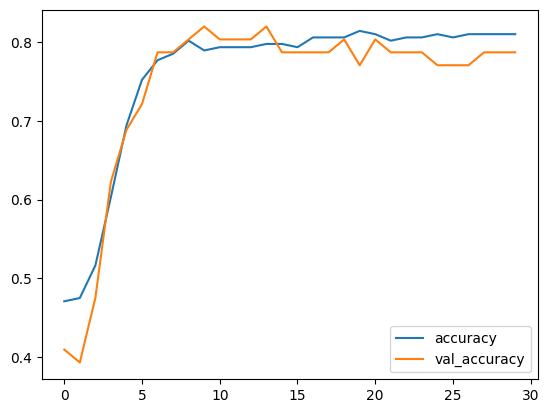

In [414]:
hist_df = pd.DataFrame(hist.history)
hist_df.loc[:, ['accuracy', 'val_accuracy']].plot();

In [415]:
# Be happy in this moment. This moment is your life.

<img src='https://media.tenor.com/l6Dq9zsAyOkAAAAM/coca-cola-gta.gif' width=50%>